<img src="./logo_UNSAM.jpg" align="right" width="150" />  -->

#### Análisis y procesamiento de señales

# Trabajo Práctico Nº7
#### Santiago Manuel Corral

## Introducción

#### 

## Código y Análisis

Importo librerías:

In [42]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio
from pytc2.sistemas_lineales import plot_plantilla

Importo datos y leo la señal de ECG

In [43]:
#Muestreos del ECG
fs = 1000 #Hz
nyq_frec = fs/2
ripple = 1.0 #dB
attenuation = 40 #dB

#%% Inicio la señal del ECG
mat_struct = sio.loadmat('./ECG_TP4.mat') #El archivo tiene que estar en la misma carpeta del proyecto

ecg_one_lead = mat_struct['ecg_lead'].flatten()


Luego del analisis realizado para el trabajo semanal 5, vimos que la señal acumula un 98% de su potencia total alrededor de los 22,7 Hz, considerando este valor como el ancho de banda de la señal. Luego identificamos a toda la potencia entre 0Hz y 1 Hz como movimiento de la linea de base, inducido por la respiración y demas factores los cuales contaminan nuestra señal de analisis. También buscamos eliminar la componente de linea en 50Hz y demas ruidos de alta frecuencia producidos por interferencias, ruido muscular y posibles movimientos de los electrodos. Por lo que entonces se definieron los siguientes valores para la plantilla de nuestro filtro:

In [44]:
fpass = np.array ( [1.0, 35.0 ] )
fstop = np.array( [.1 , 50.] )

Consiguiendo entonces la siguiente plantilla de diseño:
<img src="./Plantilla.jpeg"/>

### Filtros IIR

Filtro IIR, Máxima Planicidad (Butter)

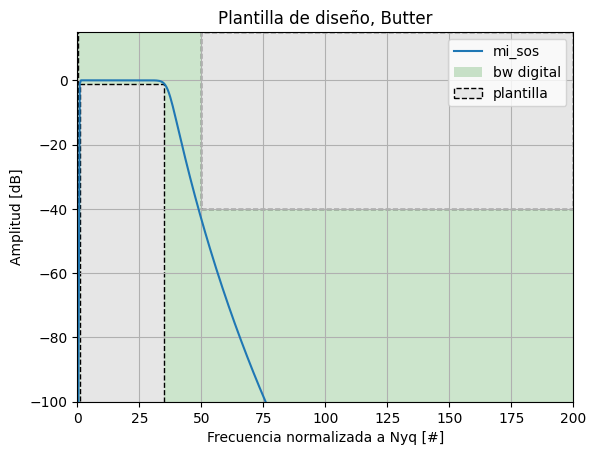

In [60]:
aprox_name = 'butter'

# Diseñamos el filtro, HACER RTA DE FASE Y DE DEMORA

mi_sos = sig.iirdesign(fpass, fstop, ripple, attenuation, ftype=aprox_name, output='sos', fs=fs)

#Analizamos el filtro
npoints = 1000

w_rad = np.append(np.logspace(-2, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w_rad = np.append(w_rad, np.linspace(40, nyq_frec, 500, endpoint=True) ) / nyq_frec * np.pi

w, hh1 = sig.sosfreqz(mi_sos, worN=w_rad)
w, hh1 = sig.sosfreqz(mi_sos, worN=npoints)

##Filtro Max Planicidad
plt.figure()

plt.plot(w / np.pi * fs / 2, 20 * np.log10(np.abs(hh1) + 1e-15), label= 'mi_sos')

plt.title('Plantilla de diseño, Butter')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.xlim([0, 200])
plt.legend()

plot_plantilla(filter_type = 'bandpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

plt.show()

#Filtramos
ECGfiltrado_maxp = sig.sosfiltfilt(mi_sos, ecg_one_lead) #Anulamos los problemas de fase

Filtro IIR, Cheby 1

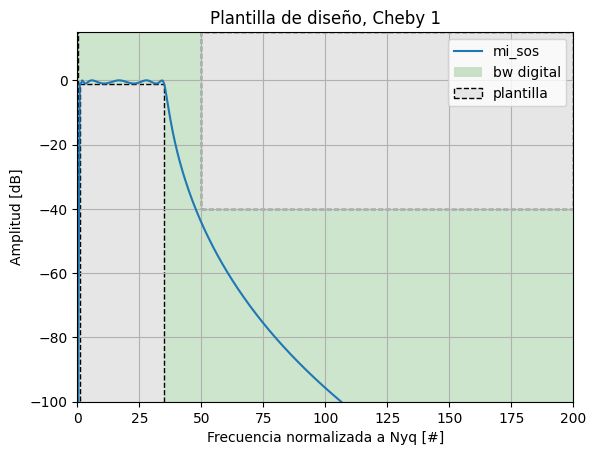

In [56]:
aprox_name = 'cheby1'

# Diseñamos el filtro, HACER RTA DE FASE Y DE DEMORA

mi_sos = sig.iirdesign(fpass, fstop, ripple, attenuation, ftype=aprox_name, output='sos', fs=fs)

#Analizamos el filtro
npoints = 1000

w_rad = np.append(np.logspace(-2, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w_rad = np.append(w_rad, np.linspace(40, nyq_frec, 500, endpoint=True) ) / nyq_frec * np.pi

w, hh2 = sig.sosfreqz(mi_sos, worN=npoints)

##Filtro Cheby1
plt.figure()

plt.plot(w / np.pi * fs / 2, 20 * np.log10(np.abs(hh2) + 1e-15), label= 'mi_sos')

plt.title('Plantilla de diseño, Cheby 1')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.xlim([0, 200])
plt.legend()

plot_plantilla(filter_type = 'bandpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)
plt.show()

#Filtramos
ECGfiltrado_cheby1 = sig.sosfiltfilt(mi_sos, ecg_one_lead) #Anulamos los problemas de fase

Filtro IIR, Cheby 2

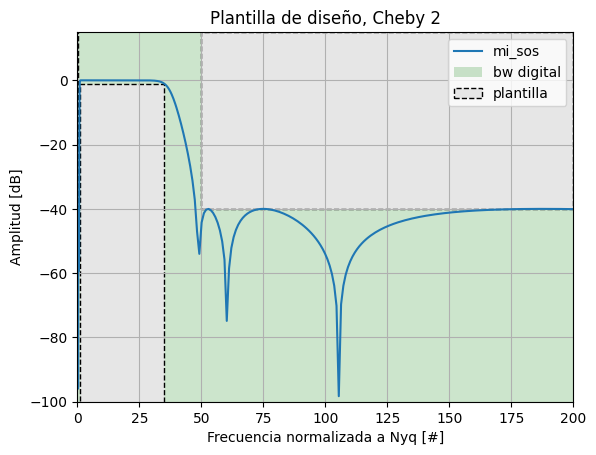

In [58]:
aprox_name = 'cheby2'

# Diseñamos el filtro, HACER RTA DE FASE Y DE DEMORA

mi_sos = sig.iirdesign(fpass, fstop, ripple, attenuation, ftype=aprox_name, output='sos', fs=fs)

#Analizamos el filtro
npoints = 1000

w_rad = np.append(np.logspace(-2, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w_rad = np.append(w_rad, np.linspace(40, nyq_frec, 500, endpoint=True) ) / nyq_frec * np.pi

w, hh3 = sig.sosfreqz(mi_sos, worN=w_rad)

##Filtro Cheby2
plt.figure()

plt.plot(w / np.pi * fs / 2, 20 * np.log10(np.abs(hh3) + 1e-15), label= 'mi_sos')

plt.title('Plantilla de diseño, Cheby 2')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.xlim([0, 200])
plt.legend()

plot_plantilla(filter_type = 'bandpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)
plt.show()

#Filtramos
ECGfiltrado_cheby2 = sig.sosfiltfilt(mi_sos, ecg_one_lead) #Anulamos los problemas de fase

Filtro IIR, Elipse

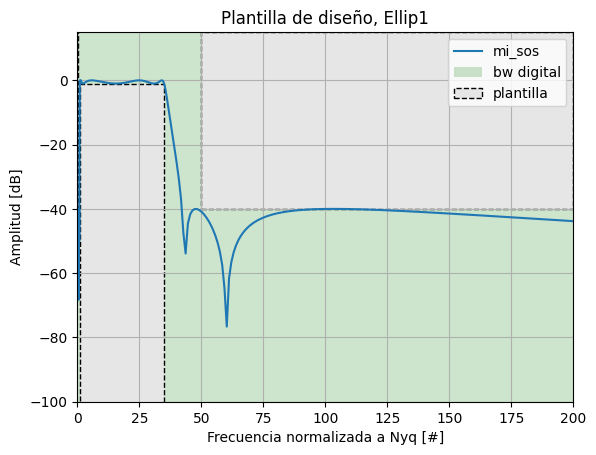

In [55]:
aprox_name = 'ellip'

# Diseñamos el filtro, HACER RTA DE FASE Y DE DEMORA

mi_sos = sig.iirdesign(fpass, fstop, ripple, attenuation, ftype=aprox_name, output='sos', fs=fs)

#Analizamos el filtro
npoints = 1000

w_rad = np.append(np.logspace(-2, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w_rad = np.append(w_rad, np.linspace(40, nyq_frec, 500, endpoint=True) ) / nyq_frec * np.pi

w, hh4 = sig.sosfreqz(mi_sos, worN=w_rad)

##Filtro Elipse
plt.figure()
plt.plot(w / np.pi * fs / 2, 20 * np.log10(np.abs(hh4) + 1e-15), label= 'mi_sos')

plt.title('Plantilla de diseño, Ellip1')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.xlim([0, 200])
plt.legend()

plot_plantilla(filter_type = 'bandpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)
plt.show()

#Filtramos
ECGfiltrado_Eli = sig.sosfiltfilt(mi_sos, ecg_one_lead) #Anulamos los problemas de fase

### Filtros FIR
Filtro IIR, Ventana

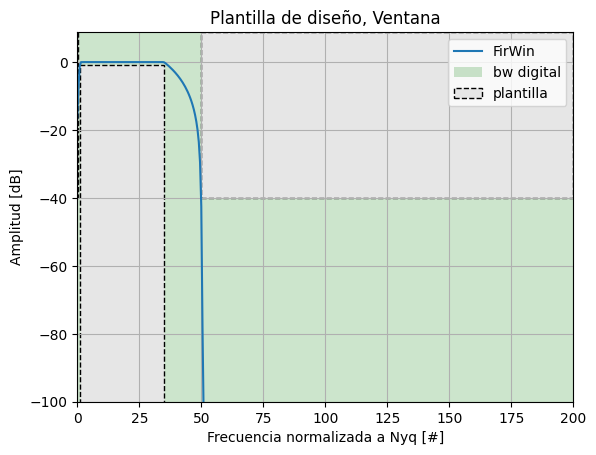

In [65]:
# Definir frecuencias normalizadas (0 a 1)
ff = np.array([0, fstop[0], fpass[0], fpass[1], fstop[1], nyq_frec])
hh = np.array([0, 0, 1, 1, 0, 0])

# Diseño del filtro
Filtro_Ventana = sig.firwin2(numtaps = 2501, freq = ff, gain = hh, fs = 1000)
#Necesito tener orden impar! Estudiar esto de los filtros fir

w, hhw = sig.freqz(Filtro_Ventana, worN=npoints) #Interpolo los puntos obtenidos

plt.figure()

plt.plot(w/np.pi * fs / 2, 20*np.log10(np.abs(hhw)+1e-15), label= 'FirWin')

plt.title('Plantilla de diseño, Ventana')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.xlim([0, 200])
plt.legend()

plot_plantilla(filter_type = 'bandpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)
plt.show()

#Filtramos
ECGfiltrado_ventana = np.convolve(ecg_one_lead, Filtro_Ventana, mode='same')


Filtro IIR, Cuadrados Minimos

Para un correcto funcionamiento del metodo, se moficaron los valores de la banda de transición en alta frecuencia, redefiniendo la misma como de 1Hz. De esta manera obtenemos una banda de paso simétrica, salvandonos de tener que definir un LPF y un HPF para la correcta aplicación del método. 

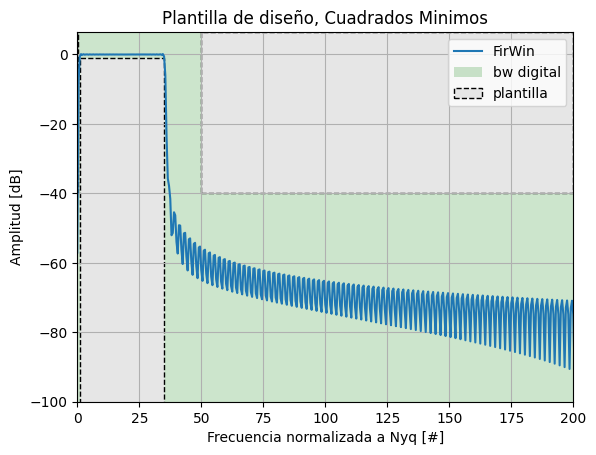

In [76]:
# Definir frecuencias normalizadas (0 a 1)
ff = np.array([0, fstop[0], fpass[0], fpass[1], fpass[1]+1, nyq_frec]) #fpass[1]+1 De esta manera trabajamos con una banda de paso simetrica
hh = np.array([0, 0, 1, 1, 0, 0]) 

# Diseño del filtro
Filtro_Ventana = sig.firls(numtaps = 1501, bands = ff, desired = hh, fs = 1000)
#Necesito tener orden impar! Estudiar esto de los filtros fir

w, hh = sig.freqz(Filtro_Ventana, worN=npoints) #Interpolo los puntos obtenidos

plt.figure()

plt.plot(w/np.pi * fs / 2, 20*np.log10(np.abs(hh)+1e-15), label= 'FirWin')

plt.title('Plantilla de diseño, Cuadrados Minimos')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.legend()
plt.xlim([0, 200])

plot_plantilla(filter_type = 'bandpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)
plt.show()

#Filtramos
ECGfiltrado_Cuadrados = np.convolve(ecg_one_lead, Filtro_Ventana, mode='same')

Filtro IIR, Remez. En este caso, si bien se podría haber realizado la misma modificación en la banda de transición que para el caso de cuadrados mínimos, se decidió partir el filtro en un pasa altos y un pasa bajos y luego concatenarlos en cadena. 

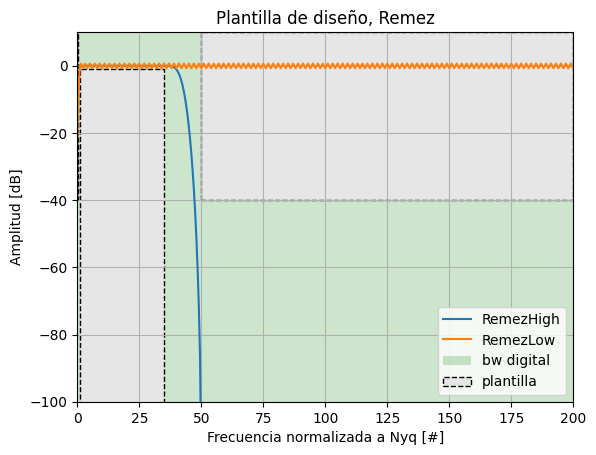

In [77]:
#Para este caso partiremos el filtro en un pasa bajos y un pasa altos
# Definir frecuencias normalizadas (0 a 1)
ffH = np.array([0, fstop[0], fpass[0], nyq_frec]) 
hhH = np.array([0, 1]) 

ffL = np.array([0, fpass[1], fstop[1], nyq_frec]) 
hhL = np.array([1, 0]) 

# Diseño del filtro
Remez_High = sig.remez(numtaps = 1001, bands = ffH, desired = hhH, fs = 1000) 
Remez_Low= sig.remez(numtaps = 501, bands = ffL, desired = hhL, fs = 1000)
#Necesito un orden mucho mayor para aplicar el pasa altos

w1, hh1 = sig.freqz(Remez_Low, worN=npoints) #Interpolo los puntos obtenidos
w2, hh2 = sig.freqz(Remez_High, worN=npoints) #Interpolo los puntos obtenidos

plt.figure()

plt.plot(w/np.pi * fs / 2, 20*np.log10(np.abs(hh1)+1e-15), label= 'RemezHigh')
plt.plot(w/np.pi * fs / 2, 20*np.log10(np.abs(hh2)+1e-15), label= 'RemezLow')

plt.title('Plantilla de diseño, Remez')
plt.xlabel('Frecuencia normalizada a Nyq [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.legend()
plt.xlim([0,200])

plot_plantilla(filter_type = 'bandpass' , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)
plt.show()

#Filtramos
ECGfiltrado_Remez_Low = np.convolve(ecg_one_lead, Remez_Low, mode='same')
ECGfiltrado_Remez = np.convolve(ECGfiltrado_Remez_Low, Remez_High, mode='same')


# Resultados y Conclusiónes

Analicemos el filtrado en ciertas regiones de interes para evaluar su correcto comportamiento. 

- De 10k a 11k muestras para corroborar un correcto filtrado en el ancho de banda del ECG (principio del estudio)
- De 300k muestras a 312k muestras ya que se trata de una zona con ruido de alta frecuencia, además que tenemos latidos ectópicos, los cuales nos permiten evaluar la respuesta al impulso del filtro.
- De 720k muestras a 744k muestras, aquí tenemos un notable movimiento de la linea de base debido al ruido de baja frecuencia, en el cual también nos interesa evaluar el comportamiento del filtro.

## Filtros IIR

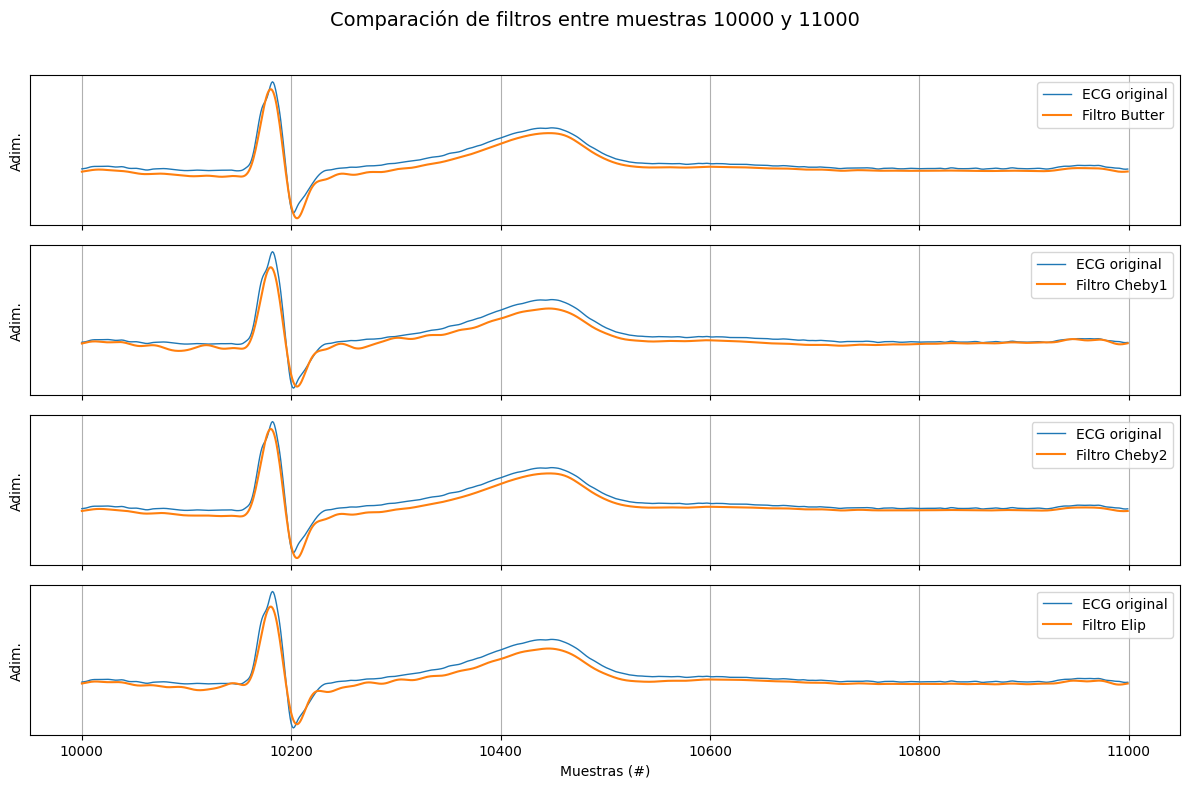

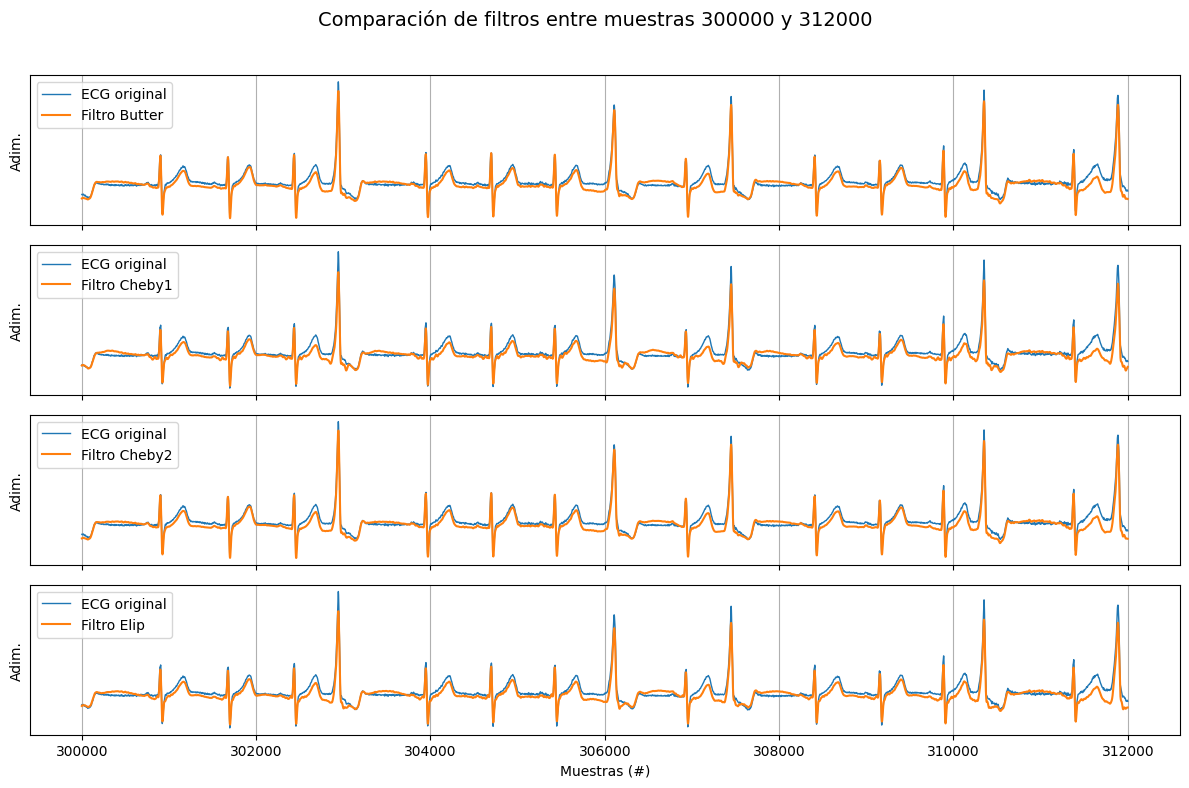

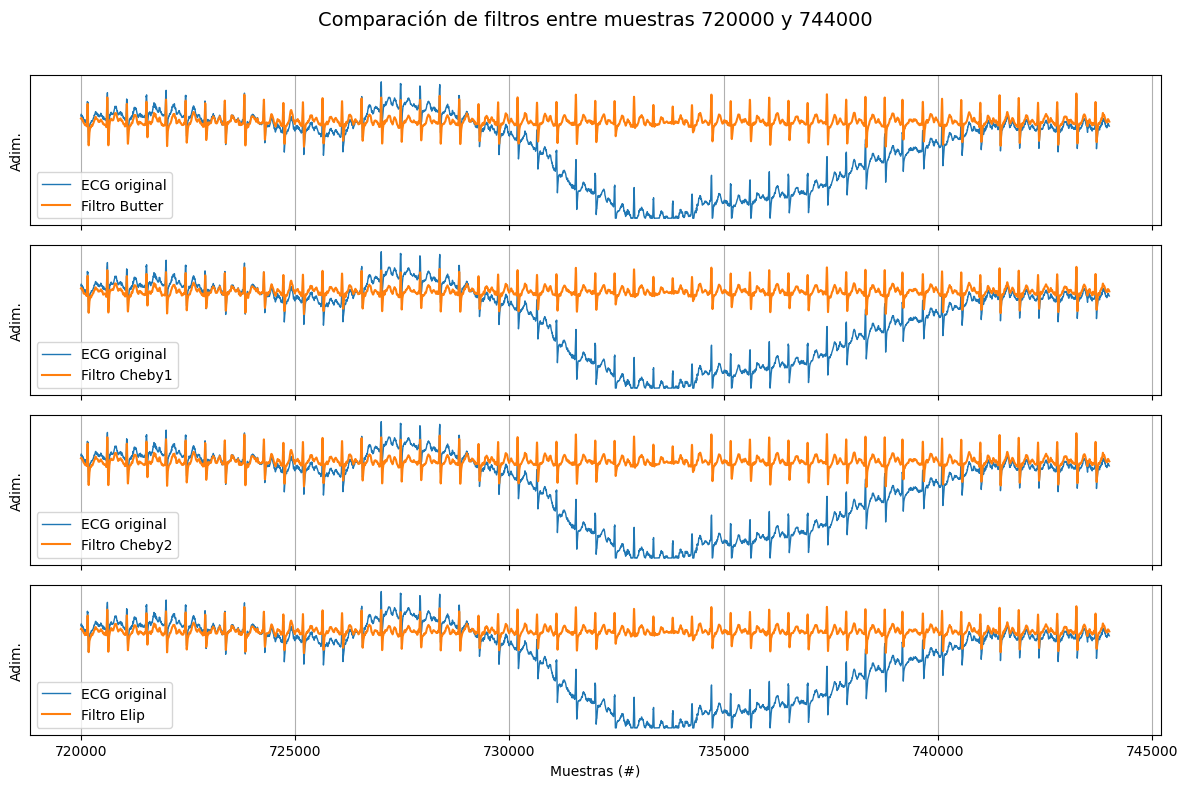

In [59]:
# Regiones de interés expresadas en muestras
regs_interes = [
    [10_000, 11_000],
    [300_000, 312_000],
    [720_000, 744_000]
]

# Lista con tus señales filtradas y sus nombres
filtros = [
    ('Butter', ECGfiltrado_maxp),
    ('Cheby1', ECGfiltrado_cheby1),
    ('Cheby2', ECGfiltrado_cheby2),
    ('Elip', ECGfiltrado_Eli),
]

demora = 0  # offset si fuera necesario

# Iterar sobre cada región
for start, end in regs_interes:
    zoom_region = np.arange(start, end)

    fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'Comparación de filtros entre muestras {start} y {end}', fontsize=14)

    for i, (nombre, señal) in enumerate(filtros):
        axs[i].plot(zoom_region, ecg_one_lead[zoom_region], label='ECG original', linewidth=1)
        axs[i].plot(zoom_region, señal[zoom_region + demora], label=f'Filtro {nombre}', linewidth=1.5)
        axs[i].legend()
        axs[i].set_ylabel('Adim.')
        axs[i].grid(True)
        axs[i].set_yticks([])

    axs[-1].set_xlabel('Muestras (#)')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


Podemos observar un comportamiento deseado de los 4 métodos de filtrado para las 3 regiones analizadas. 

- Región 1, banda de paso:
Podemos observar comportamientos muy similares, pudiendo reconocer el complejo QRS con facilidad. Hilando fino podemos decir que el Butterworth y el 
Chebyshev 1 resultan mas suaves pero tienen un leve retraso de fase. 

- Región 2, comportamiento pasa bajos:
Resultan todos bastante equilibrados. En este fragmento resulta interesante analizar el comportamiento bajo un latido ectópico, este funciona a modo de impulso. Vemos que por su naturaleza de filtro IIR (Infinite Impulse Response), ante un pico abrupto en la señal el filtro responde generando una respuesta que no coincide con la señal real, este comportamiento debe ser considerado a la hora de implementar el filtro.

- Región 3, comportamiento pasa altos:
Aquí la verdad note una respuesta muy similar en los 3, eliminando muy bien el movimiento de linea de base causado por un ruido de baja frecuencia.

## Filtros IIR

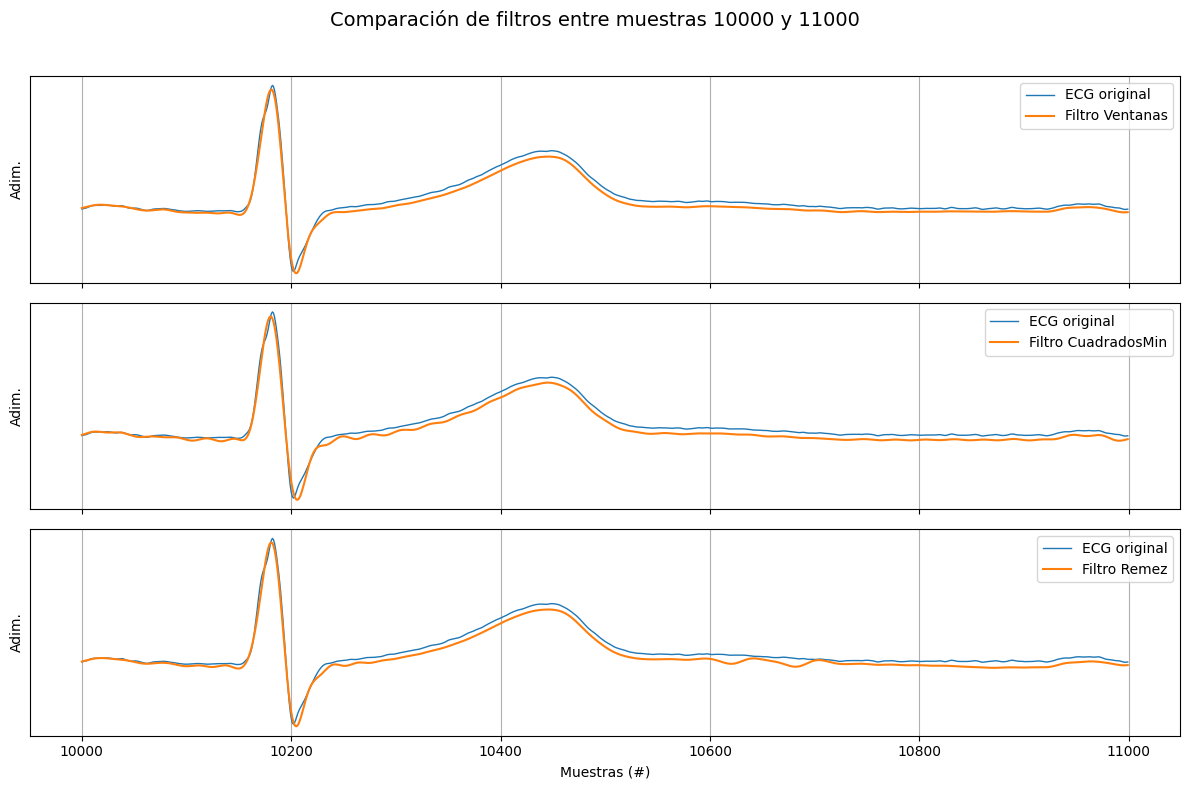

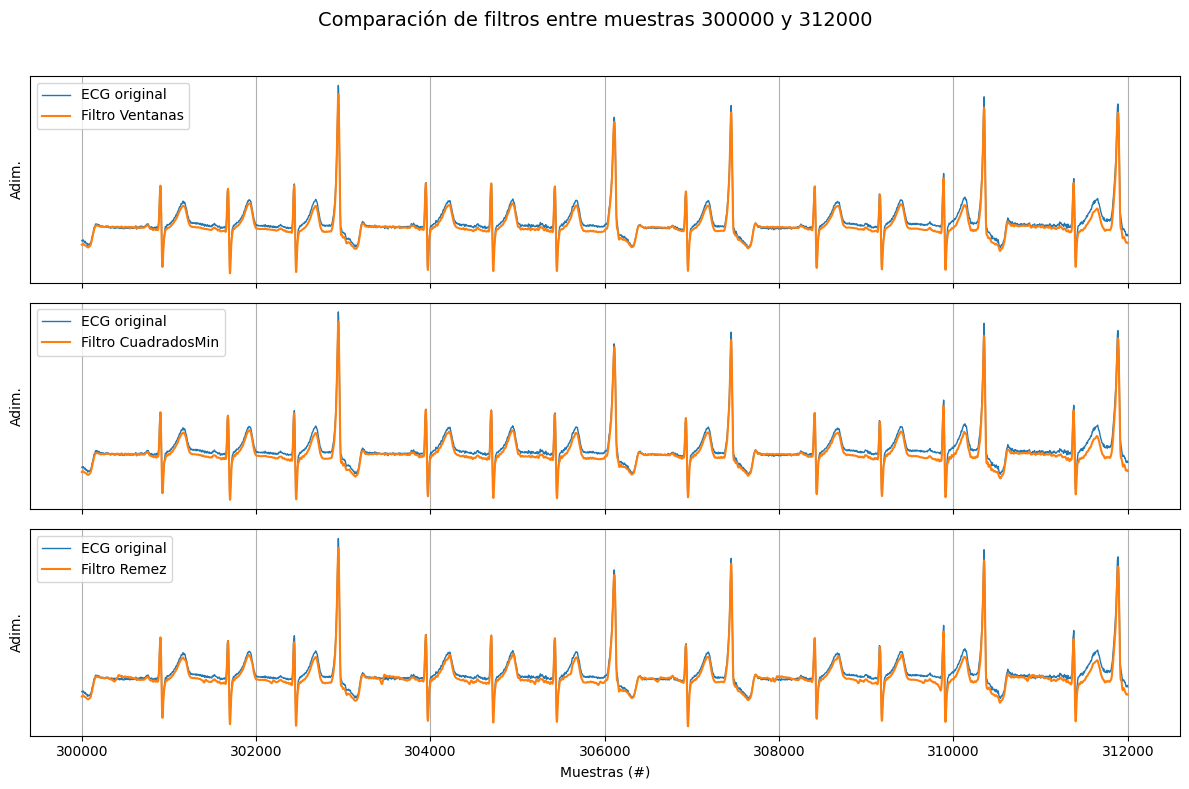

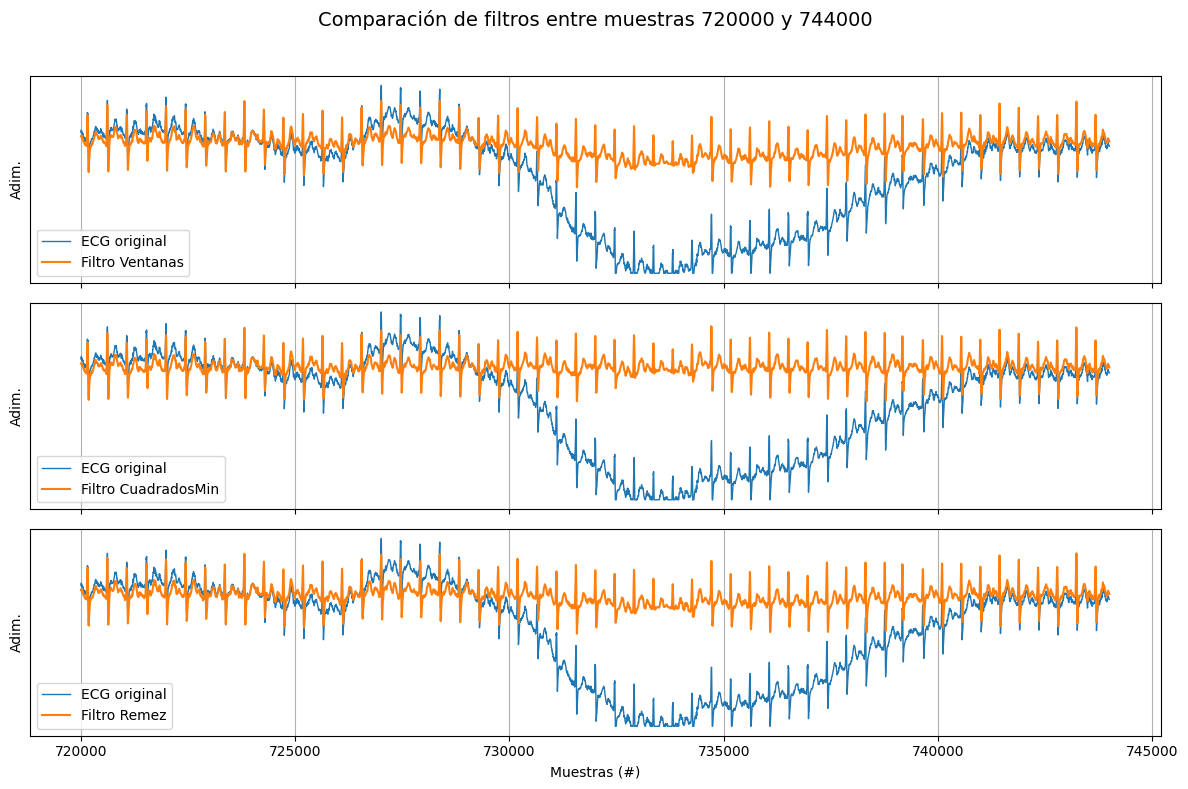

In [80]:
# Regiones de interés expresadas en muestras
regs_interes = [
    [10_000, 11_000],
    [300_000, 312_000],
    [720_000, 744_000]
]

# Lista con tus señales filtradas y sus nombres
filtros = [
    ('Ventanas', ECGfiltrado_ventana),
    ('CuadradosMin', ECGfiltrado_Cuadrados),
    ('Remez', ECGfiltrado_Remez),
]

demora = 0  # offset si fuera necesario

# Iterar sobre cada región
for start, end in regs_interes:
    zoom_region = np.arange(start, end)

    fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f'Comparación de filtros entre muestras {start} y {end}', fontsize=14)

    for i, (nombre, señal) in enumerate(filtros):
        axs[i].plot(zoom_region, ecg_one_lead[zoom_region], label='ECG original', linewidth=1)
        axs[i].plot(zoom_region, señal[zoom_region + demora], label=f'Filtro {nombre}', linewidth=1.5)
        axs[i].legend()
        axs[i].set_ylabel('Adim.')
        axs[i].grid(True)
        axs[i].set_yticks([])

    axs[-1].set_xlabel('Muestras (#)')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

En este caso podemos ver incluso un comportamiento mas parejo que para los filtros IIR entre los métodos. El único detalle que me llamo la atención fue al analizar en la zona del ancho de banda, viendo como la mejor respuesta en la banda de paso la tiene el filtro de ventanas, mientras que para los otros dos métodos se pueden identificar unas oscilaciones antes y después del complejo QRS. 

Por otro lado, en el caso del comportamiento pasa bajos, podemos ver como no se filtra completamente el movimiento línea de base, teniendo todavía una leve componente de baja frecuencia afectando a la señal original. Aunque esto parece fácilmente corregible achicando un poco la banda de paso, filtrando aún más estas frecuencias bajas. 